In [3]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
u0 = 1
u1 = 0
x0 = 1/sqrt(2)

In [5]:
kax = lambda x: 1
kbx = lambda x: exp(sin(x))

qax = lambda x: 1
qbx = lambda x: 2

fax = lambda x: exp(x)
fbx = lambda x: exp(x)

In [6]:
ka = kax(x0)
kb = kbx(x0)

qa = qax(x0)
qb = qbx(x0)

fa = fax(x0)
fb = fbx(x0)

In [7]:
la = sqrt(qa/ka)
lb = sqrt(qb/kb)

ma = fa/qa
mb = fb/qb

In [8]:
A11 = exp(-la*x0) - exp(la*x0)
A12 = exp(lb*(2-x0)) - exp(lb*x0)
A21 = ka*la*(exp(la*x0)+exp(-la*x0))
A22 = kb*lb*(exp(lb*(2-x0))+exp(lb*x0))

B1 = mb-ma+(ma-u0)*exp(la*x0)-(mb-u1)*exp(lb*(1-x0))
B2 = ka*la*(u0-ma)*exp(la*x0)+kb*lb*(u1-mb)*exp(lb*(1-x0))

C1 = (A22*(A11*(u0-ma) - B1) - A12*(A21*(u0-ma) - B2))/(A11*A22-A12*A21)
C2 = (B1*A22-B2*A12)/(A11*A22-A12*A21)
C3 = (B2*A11-B1*A21)/(A11*A22-A12*A21)
C4 = exp(lb)*(u1-mb) - C3*exp(2*lb)

In [9]:
ux = lambda x: C1*exp(la*x)+C2*exp(-la*x)+ma if x<x0 else C3*exp(lb*x)+C4*exp(-lb*x)+mb

In [10]:
ux(0.8)

0.1947038686517213

In [26]:
# N = 16384
N =81921
xx = np.linspace(0, 1, N)
h = np.diff(xx)[0]

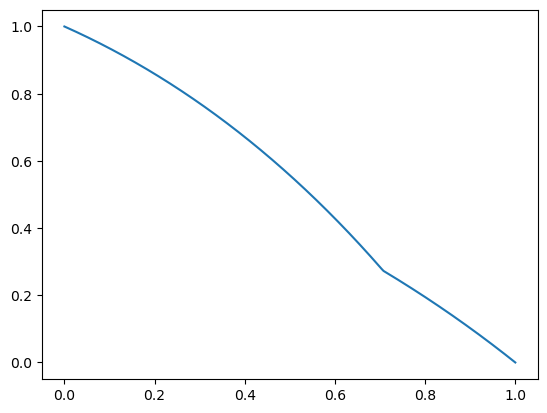

In [27]:
u_an = [ux(x) for x in xx]
plt.plot(xx, u_an)
plt.show()

In [28]:
ia = floor(x0/h)
ib = ia + 1
xx[ia]<=x0<=xx[ib]

True

In [29]:
L = len(xx)

aс = [0]*L
bс = [0]*L
cс = [0]*L
dс = [0]*L

for i in range(1, ia):
    aс[i] = ka
    bс[i] = -(2*ka)-(qa*(h**2))
    cс[i] = ka
    dс[i] = -fa*(h**2)

for i in range(ib+1, L):
    aс[i] = kb
    bс[i] = -(2*kb)-(qb*(h**2))
    cс[i] = kb
    dс[i] = -fb*(h**2)

In [30]:
def thompson(a, b, c, d):
    alpha = [0]*L
    beta = [0]*L

    alpha[1] = -a[1]/b[1]
    beta[1] = (d[1]-(c[1]*u0))/b[1]

    alpha[L-1] = -c[L-1]/b[L-1]
    beta[L-1] = (d[L-1]-(c[L-1]*u1))/b[L-1]

    for i in range(2, ia):
        alpha[i] = -a[i] / (b[i]+(c[i]*alpha[i-1]))
        beta[i] = (d[i]-(c[i]*beta[i-1])) / (b[i]+(c[i]*alpha[i-1]))

    for i in range(L-2, ib, -1):
        alpha[i] = -c[i] / (b[i]+(a[i]*alpha[i+1]))
        beta[i] = (d[i]-(a[i]*beta[i+1])) / (b[i]+(a[i]*alpha[i+1]))

    u = [0]*N
    u[0]=u0
    u[N-1]=u1

    u[ia]=((ka*beta[ia-1]) + (kb*beta[ib+1])) / ((ka*(1-alpha[ia-1])) + (kb*(1-alpha[ib+1])))
    u[ib] = u[ia]
    u[ia-1] = (alpha[ia-1]*u[ia]) + beta[ia-1]
    u[ib+1] = (alpha[ib+1]*u[ib]) + beta[ib+1]


    for i in range(ia-1, 0, -1):
        u[i] = (alpha[i]*u[i+1]) + beta[i]

    for i in range(ib+1, N):
        u[i] = (alpha[i]*u[i-1]) + beta[i]

    return u

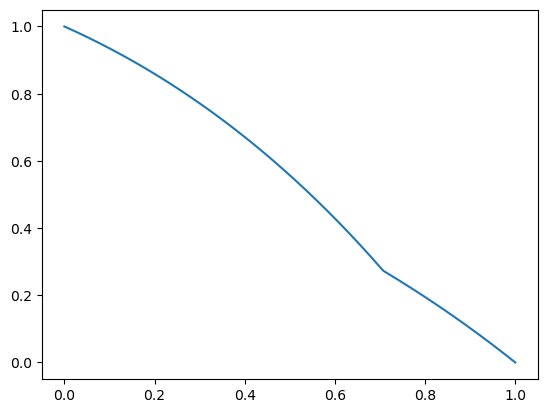

In [31]:
u_const = thompson(aс, bс, cс, dс)
plt.plot(xx, u_const)
plt.show()

In [32]:
L = len(xx) + 1

av = [0]*L
bv = [0]*L
cv = [0]*L
dv = [0]*L

for i in range(1, ia):
    av[i] = kax(i*h + h/2)
    bv[i] = -kax(i*h + h/2)-kax(i*h - h/2)-qax(i*h)*(h**2)
    cv[i] = kax(i*h - h/2)
    dv[i] = -fax(i*h)*(h**2)

for i in range(ib+1, L):
    av[i] = kbx(i*h + h/2)
    bv[i] = -kbx(i*h + h/2)-kbx(i*h - h/2)-qbx(i*h)*(h**2)
    cv[i] = kbx(i*h - h/2)
    dv[i] = -fbx(i*h)*(h**2)

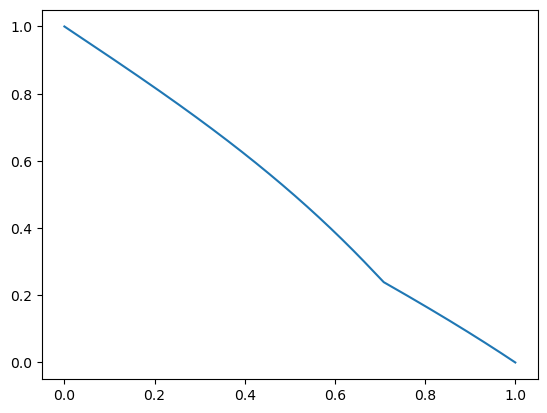

In [33]:
u_var = thompson(av, bv, cv, dv)
plt.plot(xx, u_var)
plt.show()

In [34]:
n = N//10
diffc = [abs(u1 - u2) for u1, u2 in zip(u_const, u_an)]
pd.DataFrame({'x': xx[::n], 'u_const': u_const[::n], 'u_an': u_an[::n], 'd': diffc[::n]}).T

,0,1,2,3,4,5,6,7,8,9,10
x,0.0,1.000000e-01,2.000000e-01,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000e+00
u_const,1.0,9.349437e-01,8.589465e-01,0.771248,0.670970,0.557110,0.428527,0.283935,0.194713,0.102130,1.308970e-05
u_an,1.0,9.349441e-01,8.589475e-01,0.771249,0.670972,0.557112,0.428530,0.283938,0.194704,0.102119,2.220446e-16
d,0.0,4.706481e-07,9.549573e-07,0.000001,0.000002,0.000003,0.000003,0.000004,0.000009,0.000011,1.308970e-05


In [35]:
max(diffc)

1.3089698736157831e-05

In [37]:
n = N//10
diffv = [abs(u1 - u2) for u1, u2 in zip(u_var, u_an)]
pd.DataFrame({'x': xx[::n], 'u_var': u_var[::n], 'u_an': u_an[::n], 'd': diffv[::n]}).T

,0,1,2,3,4,5,6,7,8,9,10
x,0.0,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000e+00
u_var,1.0,0.910119,0.818278,0.722391,0.620213,0.509299,0.386968,0.250258,0.167794,0.086536,2.189332e-05
u_an,1.0,0.934944,0.858947,0.771249,0.670972,0.557112,0.428530,0.283938,0.194704,0.102119,2.220446e-16
d,0.0,0.024825,0.040670,0.048859,0.050759,0.047813,0.041562,0.033680,0.026910,0.015583,2.189332e-05


In [38]:
max(diffv[::n])

0.05075920428222336